## FFTW

Now we introduce about the package FFTW, this package provides Julia using the software in the FFTW library to do fast Fourier transforms (ffts), what we will mention below.

In [2]:
using FFTW
using LinearAlgebra
using Plots

## fft's input method 

Fourier transform converts a real and complex-valued arrays of arbitrary size into fourier coefficient. In the below, we inputs an array that formed by function, we can know that if the data is one-dimension, input the row vector or column vector, the result is same.

In [3]:
fft([0; 1; 2; 1])

4-element Array{Complex{Float64},1}:
  4.0 + 0.0im
 -2.0 + 0.0im
  0.0 + 0.0im
 -2.0 + 0.0im

In [4]:
fft([0, 1, 2, 1])

4-element Array{Complex{Float64},1}:
  4.0 + 0.0im
 -2.0 + 0.0im
  0.0 + 0.0im
 -2.0 + 0.0im

In [5]:
fft([0 1 2 1;1 2 3 5;2 3 6 9;1 8 6 9])

4×4 Array{Complex{Float64},2}:
  59.0+0.0im   -13.0+10.0im  -17.0+0.0im  -13.0-10.0im
 -16.0+13.0im    4.0-9.0im     4.0-7.0im    0.0+3.0im 
 -11.0+0.0im     1.0+2.0im     9.0+0.0im    1.0-2.0im 
 -16.0-13.0im    0.0-3.0im     4.0+7.0im    4.0+9.0im 

## fft's operation time

The following two examples tell us that fast Fourier transforms (ffts) is efficient. 
* We can discover that the first time we do Fourier transform cost more time than others, this is because of that fft will always copy a real input array to complex array first before performing the transform.
* And notice that if we use @time to calculate time, it need to do more times to get the average.

In [6]:
x = randn(92993)
@time y = fft(x);
x = randn(92993)
@time y = fft(x);
x = randn(92993)
@time y = fft(x);
x = randn(92993)
@time y = fft(x);

  0.146067 seconds (67.72 k allocations: 6.397 MiB)
  0.122876 seconds (60 allocations: 2.841 MiB)
  0.106883 seconds (60 allocations: 2.841 MiB)
  0.110024 seconds (60 allocations: 2.841 MiB)


* From the following two examples, we can obviously discover that even number do Fourier transform is more efficient than odd number.

In [8]:
x = randn(2^17)
@time y = fft(x);
x = randn(2^17)
@time y = fft(x);
x = randn(2^17)
@time y = fft(x);
x = randn(2^17)
@time y = fft(x);

  0.022572 seconds (60 allocations: 4.003 MiB)
  0.017547 seconds (60 allocations: 4.003 MiB)
  0.017852 seconds (60 allocations: 4.003 MiB)
  0.015954 seconds (60 allocations: 4.003 MiB)


In [9]:
x = randn(2^17-1)
@time y = fft(x);
x = randn(2^17-1)
@time y = fft(x);
x = randn(2^17-1)
@time y = fft(x);

  0.133320 seconds (60 allocations: 4.003 MiB)
  0.125498 seconds (60 allocations: 4.003 MiB, 2.23% gc time)
  0.113829 seconds (60 allocations: 4.003 MiB)


## fft's accuracy

Now we want to test the accuracy of fft and ifft.
* First, we store what we want to transform into a. 
* Second, we use norm to measure the error between ifft(fft(a)) and a. 

If we get small error, it's represent that fft and ifft are very accurate to convert function values into Fourier coefficients.

In [10]:
a = rand(8) + im*rand(8);
norm(ifft(fft(a)) - a)

3.925231146709438e-17

In [11]:
a = rand(2^17) + im*rand(2^17);
norm(ifft(fft(a)) - a)

9.918069130320701e-14

In [12]:
a = rand(2^17-1) + im*rand(2^17-1);
norm(ifft(fft(a)) - a)

2.343517456487454e-13

## example

Now we use $y = \sin(x)$ and $y = \cos(x)$ to see the operation of fft. 
* Because $y = \sin(x)$ and $y = \cos(x)$ is periodic function so the range is from 0 to $2\pi$
* We choose N+1 points between 0 to $2\pi$ so x = range(0,stop=2*pi,length=N+1), but since that $\sin(0)$ and $\sin(2\pi)$ are same so x = x[1:N]

In [23]:
N=100;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
k = [0:N/2, -N/2+1:-1]

2-element Array{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},1}:
 0.0:1.0:50.0  
 -49.0:1.0:-1.0

Now we want to get Fourier coefficient of $y = \sin(x)$.
* First, because x is an array so we use fs = sin.(x), then we store the value in fs.
* Second, we do Fourier transform and store it in fs_hat.
* Third, we plot the imaginary part of the results after transforming. 

Since that, by Euler's function $\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} = \frac{1}{2i}(e^{i\theta} - e^{-i\theta})$

and we get Fourier's coefficient by discrete Fourier transform so $\hat{fs}_1 =\frac{1}{i}50$, $\hat{fs}_{-1} = \frac{1}{i}(-50)$

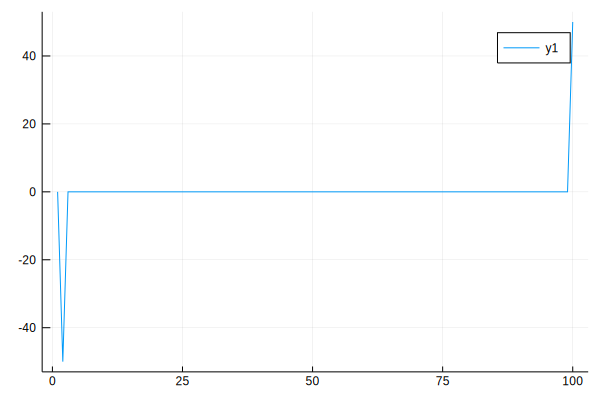

In [14]:
fs = sin.(x);
fs_hat = fft(fs);
plot(imag(fs_hat))

Since that, by Euler's function $\cos(\theta) = \frac{e^{i\theta} + e^{-i\theta}}{2} = \frac{1}{2}(e^{i\theta} + e^{-i\theta})$

and we get Fourier's coefficient by discrete Fourier transform so $\hat{fs}_1 = 50$, $\hat{fs}_{-1} = -50$

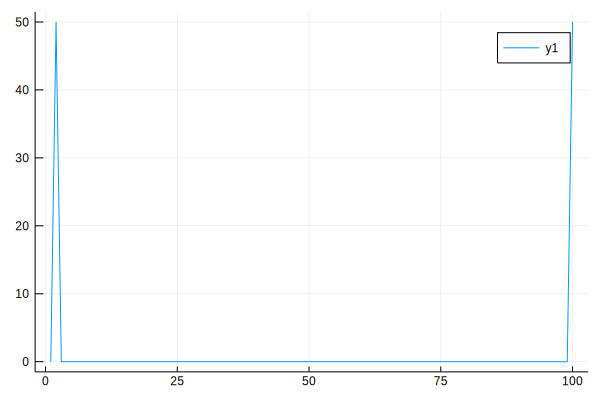

In [15]:
fc = cos.(x);
fc_hat = fft(fc);
plot(real(fc_hat))

In [27]:
N=1000;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
k = [0:N/2, -N/2+1:-1]

2-element Array{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},1}:
 0.0:1.0:500.0  
 -499.0:1.0:-1.0

Since that, by Euler's function 
* $\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} = \frac{1}{2i}(e^{i\theta} - e^{-i\theta})$
* $\sin(100\theta) = \frac{e^{i100\theta} - e^{-i100\theta}}{2i} = \frac{1}{2i}(e^{i100\theta} - e^{-i100\theta})$                                

and we get Fourier's coefficient by discrete Fourier transform so 
* $\hat{fs}_1 =\frac{1}{i}50$, $\hat{fs}_{-1} = \frac{1}{i}(-50)$
* $\hat{fs}_{100} =\frac{1}{i}50$, $\hat{fs}_{-100} = \frac{1}{i}(-50)$

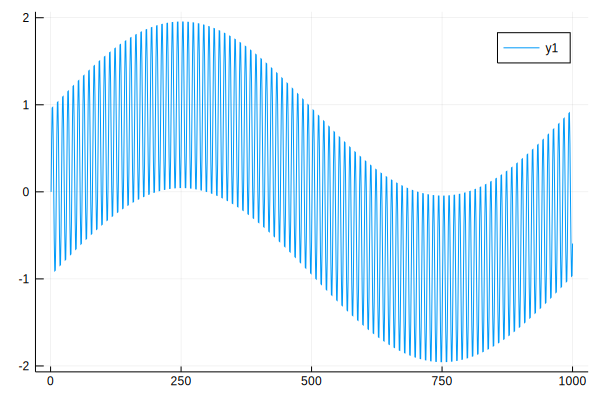

In [28]:
fw = sin.(x)+sin.(100*x);
fw_hat = fft(fw);
plot(fw)

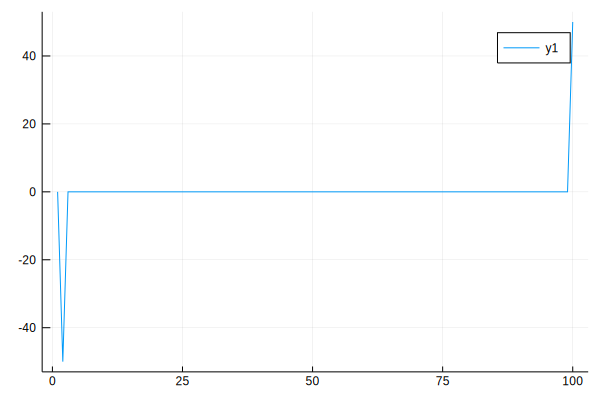

In [38]:
plot(imag(fw_hat))

In [69]:
N=100;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
k = [0:N/2, -N/2+1:-1]

2-element Array{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},1}:
 0.0:1.0:50.0  
 -49.0:1.0:-1.0